In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np    # importing numpy lib; used for working with arrays
import pandas as pd   # importing pandas lib; used for analysing data & manupulating it
import os             # used for interacting with the OS
import itertools      # used for doing all kinds of complex iterations
import re             # regular expression: provide matching operations
%matplotlib inline
import matplotlib.pyplot as plt     # used for plotting the graphs
from nltk.corpus import stopwords   # list of unwanted words of english
from nltk.corpus import wordnet     # a database of English Nouns, Adjectives, Adverbs and Verbs
from nltk.corpus import words       # includes list of english words
from nltk.stem import WordNetLemmatizer       # used for morphological analysis of the words; {good: better, best}
from nltk.tokenize import word_tokenize         # used to divide text into smaller part called tokens

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ML Project - Classifiers/checkCSV.csv', sep=',')

In [ ]:
data2 = data.rename(columns = {'Column1': 'File_Name', 'Column2': 'Content'}, inplace = False)
data.head() # used to display first n (default 5) rows of a dataset

,File_Name,Content,Category,Complete_Filename
0,001.txt,Gallery unveils interactive tree A Christmas ...,entertainment,001.txt-entertainment
1,002.txt,Jarre joins fairytale celebration French musi...,entertainment,002.txt-entertainment
2,003.txt,Musical treatment for Capra film The classic ...,entertainment,003.txt-entertainment
3,004.txt,Richard and Judy choose top books The 10 auth...,entertainment,004.txt-entertainment
4,005.txt,Poppins musical gets flying start The stage a...,entertainment,005.txt-entertainment


In [ ]:
def sentence_cleaning(sentence):                       # definig a function sentence_cleaning
# the function will resturcture/replace words in string with the specific given words
# re.sub returns a string replaced with the given word
    sentence = re.sub("\'d", " would", sentence)
    sentence = re.sub("\'ll", " will", sentence)
    sentence = re.sub("\'ve", " have", sentence)
    sentence = re.sub("\'s", "", sentence)
    sentence = re.sub("n\'t", " not", sentence)              
    sentence = re.sub("won't", "will not", sentence)
    sentence = re.sub("can't", "can not", sentence)
    sentence = re.sub("ain't", "am not", sentence)
    sentence = re.sub('[^A-Za-z ]', ' ', sentence)     # replaces all the characters other than A-Z/a-z with space
    sentence = re.sub(' +', ' ',sentence)              # removes all the unwanted spaces
    sentence = sentence.lower()                        # converts all text in the senctence into lowercase
    return sentence                                    # returning the sentence


def data_cleaning(data):                               # defining a function for data cleaning
    data['Cleaned']=None                               # adding a new coloumn to the csv file named 'Cleaned'
    for index, row in data.iterrows():                 # running a for loop to add the cleaned data to the new coloumn
        data.loc[index,'Cleaned']=sentence_cleaning(row["Content"])     # User-defined function 'sentence_cleaning' is used to clean the content
                                                                        # data.loc is used to access a group of rows & columns by label
    print('Done cleaning')
    return data

# category       text
# sports         Badminton is a sports.
# returned data...

# category       text                        Cleaned
# sports         Badminton is a sports.      badminton sports

In [ ]:
# we need index number in the data_cleaning function
data=data.reset_index(drop=True)    # adds a column with index numbers / replace existing indices with numbers starting from 0
data=data_cleaning(data)            # running the data_cleaning function on the given data

Done cleaning


In [ ]:
data.head()      # display first 5 entries of data

,File_Name,Content,Category,Complete_Filename,Cleaned
0,001.txt,Gallery unveils interactive tree A Christmas ...,entertainment,001.txt-entertainment,gallery unveils interactive tree a christmas t...
1,002.txt,Jarre joins fairytale celebration French musi...,entertainment,002.txt-entertainment,jarre joins fairytale celebration french music...
2,003.txt,Musical treatment for Capra film The classic ...,entertainment,003.txt-entertainment,musical treatment for capra film the classic f...
3,004.txt,Richard and Judy choose top books The 10 auth...,entertainment,004.txt-entertainment,richard and judy choose top books the authors ...
4,005.txt,Poppins musical gets flying start The stage a...,entertainment,005.txt-entertainment,poppins musical gets flying start the stage ad...


In [ ]:
# data.loc[333,'Content']

In [ ]:
# data.loc[333,'Cleaned']

In [ ]:
import nltk
nltk.download('stopwords')    # downloading the 'stopwords' package

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')   # list of 'english' stopwords in the package
lemmatizer = WordNetLemmatizer()            # used for morphological analysis of the words; {good: better, best}
stop.extend(['said','would','u','could','also'])      # adding words to the stop list
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def cleaning(data):                 # function definition for data cleaning by removing stopwords & lemmatizing
    data['cleaned_with_lemma']=None   # adding cloumn a coulmn to the data
    for index, row in data.iterrows():
        words=[]                      # list of words to add in the new column after data cleaning
        sentence=row["Cleaned"].split()   # splits all the content in the data into words
        for word in sentence:
            if word not in stop:          # check whether the word is a stopword or not
                words.append(lemmatizer.lemmatize(word))    # append the lemmatized words in the 'words' list
        sentence=' '.join(words)          # join the words using space & add them to 'sentence' list
        data.loc[index,'cleaned_with_lemma']=sentence     # add sentence to 'cleaned_with_lemma' column in the data
    print('Lemmatized and stop words removed')
    return data

In [ ]:
import nltk
nltk.download('wordnet')    # a database of English Nouns, Adjectives, Adverbs and Verbs

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
data=cleaning(data)     # running the 'cleaning' function on the data

Lemmatized and stop words removed


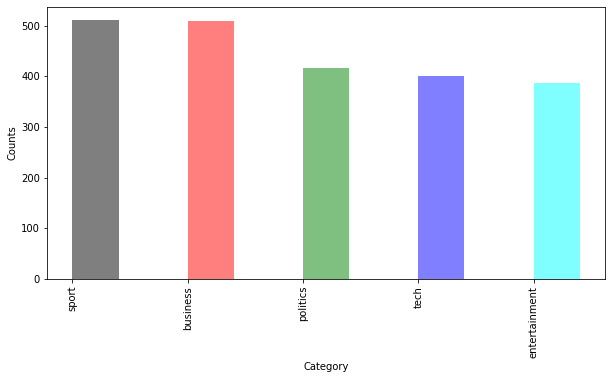

In [ ]:
# to check wheter the classes are balanced or not
data_count = data.groupby('Category')['Category'].agg(counts='count')       # category-wise count of the articles
data_count = data_count.sort_values(['counts'],ascending=False)             # increasing order of count
plt.rcParams["figure.figsize"] = (10,5)                                     # size of the plot
y_pos = np.arange(len(data_count.index))                                    # y-axis has the length of category-wise data
counts = data_count['counts'].tolist()

# plotting the bar-graph
plt.bar(y_pos, counts,align='edge', width=0.4, alpha=0.5,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(y_pos, data_count.index,rotation=90,fontsize=10)
plt.ylabel('Counts')             # label y-axis
plt.xlabel('Category')           # label x-axis
plt.show()                       # display graph

In [ ]:
import nltk
nltk.download('punkt')
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


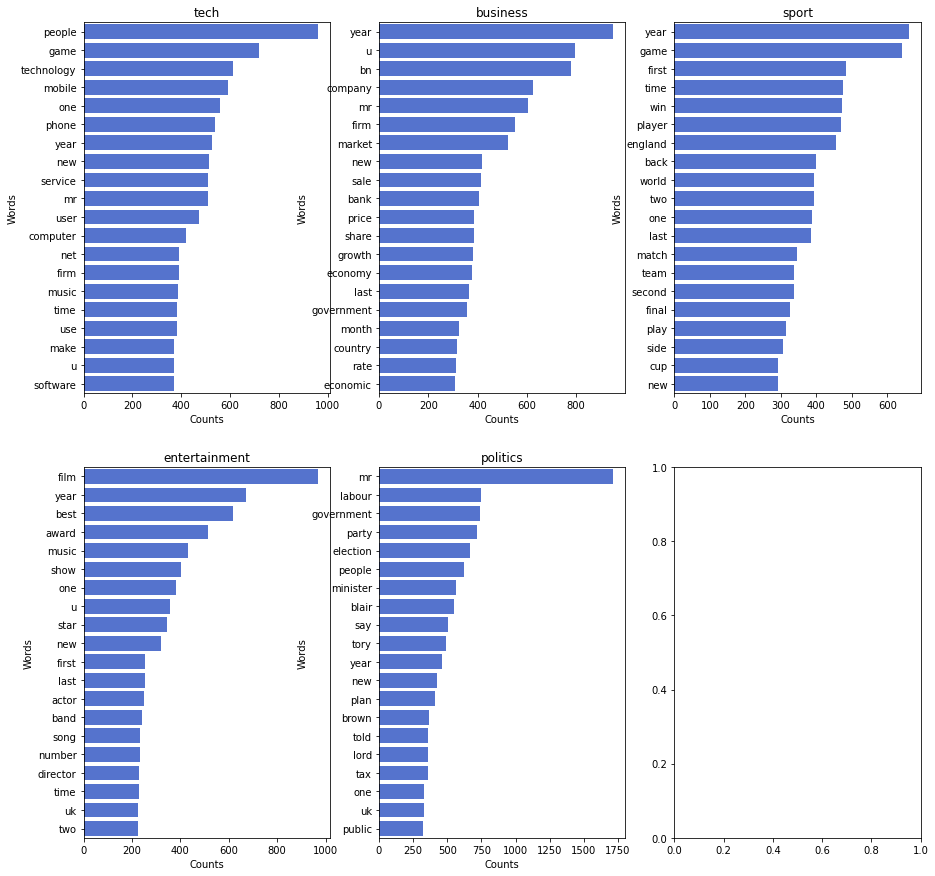

In [ ]:
a=['tech', 'business', 'sport', 'entertainment', 'politics']
fix, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 15))

for i in range(2):
    for j in range(3):
        if i*3+j != 5:
            cls_text = data[data['Category']==a[i*3+j]]
            corpus = ''
            for index, row in cls_text.iterrows():            # running through the content of respective row & column
                corpus = corpus + row['cleaned_with_lemma']

            tokens = nltk.word_tokenize(corpus)
            dict_list = {}                                   # one list of 5 dictionaries
            fdist = nltk.FreqDist(tokens)                    # an in-built function to calculate frequency distribution
            for k,v in fdist.items():
                dict_list[k] = v                             # converting freq distribution to a dictionary list of word
                
            temp = pd.DataFrame(list(dict_list.items()), columns = ['Words', 'Counts'])          
            sorted_words = temp.sort_values('Counts', ascending = False)                   # sorting the words on the basis of number of counts
            sorted_words_top = sorted_words[:20]                                           # selecting top 20 words from 'sort_words'
            sns.barplot(x="Counts", y="Words", data=sorted_words_top, color='royalblue', ax=axs[i][j]).set_title(a[i*3+j])

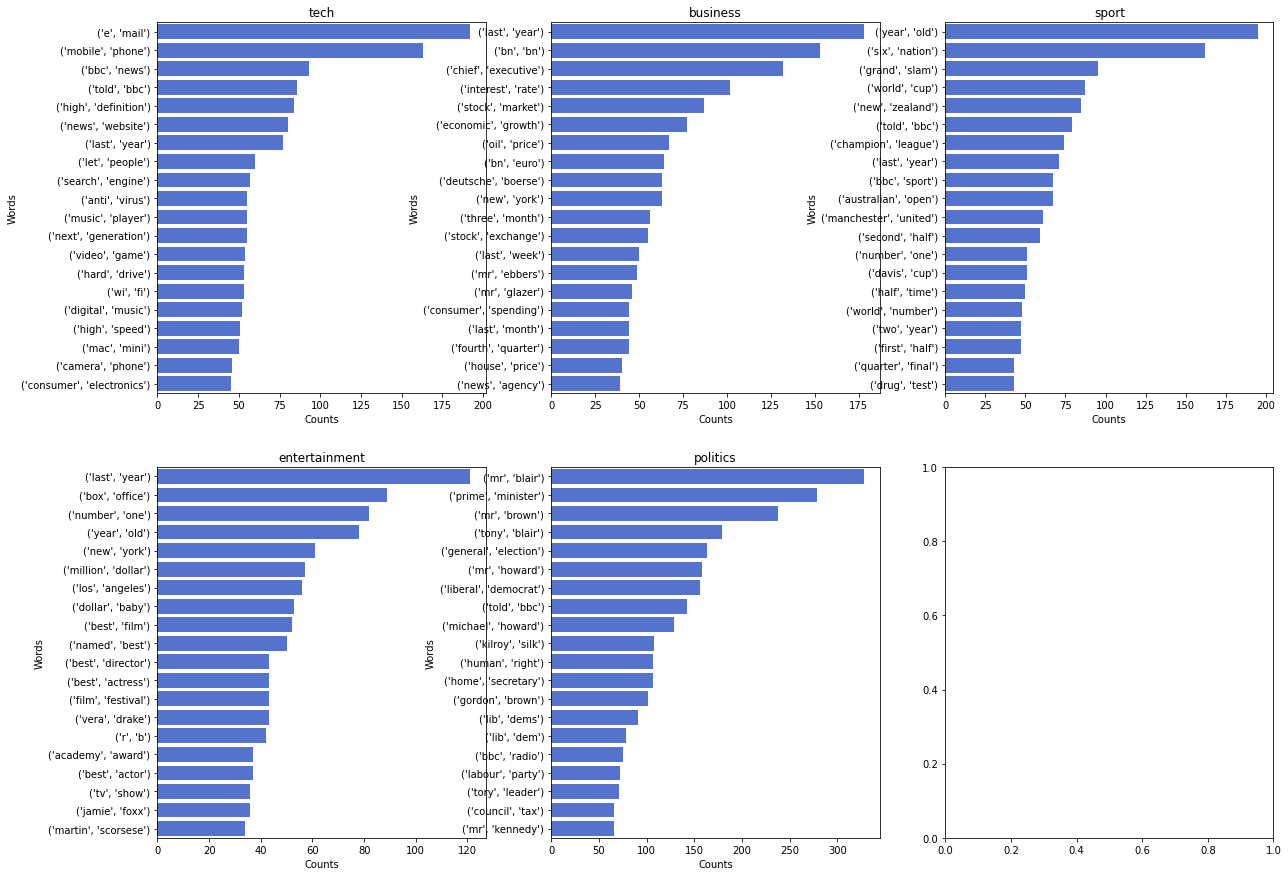

In [ ]:
fix, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 15))

for i in range(2):
    for j in range(3):
        if i*3+j != 5:
            temp_data = data[data['Category']==a[i*3+j]]
            corpus = ''
            for index, row in temp_data.iterrows():
                corpus = corpus + row['cleaned_with_lemma']
                
            tokens = nltk.word_tokenize(corpus)
            bgs = nltk.bigrams(tokens)
            bigram_dict = {}
            fdist = nltk.FreqDist(bgs)                                          # an in-built function to calculate frequency distribution
            for k,v in fdist.items():
                bigram_dict[k] = v                                              # converting freq distribution to a dictionary list of word             
                
            temp = pd.DataFrame(list(bigram_dict.items()), columns = ['Words', 'Counts'])
            sorted_words = temp.sort_values('Counts', ascending = False)                          # sorting the words on the basis of number of counts
            sorted_words_top = sorted_words[0:20]                                                 # selecting top 20 words from 'sort_words'
            sns.barplot(x="Counts", y="Words", data=sorted_words_top, color='royalblue', ax=axs[i][j]).set_title(a[i*3+j])

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()               # Encode target labels with value between 0 and n_classes-1
classes = le.fit_transform(data['Category'])    # fit the label encoder & return encoded labels of the categories 

data['class'] = classes

In [ ]:
classes

array([1, 1, 1, ..., 4, 4, 4])

In [ ]:
le.classes_     #['business', 'entertainment', 'politics', 'sport', 'tech'] = [0, 1, 2, 3, 4]

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split # in-built function to split the data set into 2 subsets: Train & Test

x_train, x_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'class'], data[['class']],
                                                    test_size=0.2,
                                                    random_state=0, # select train and test randomly. int values gives same output everytime
                                                    stratify=data[['class']]) # to balance the classes in train and test too

In [ ]:
#===============================================================================================================================================================================#
#---------------------------------------------------------------------------------POST MID-TERM---------------------------------------------------------------------------------#
#===============================================================================================================================================================================#

In [ ]:
# defining a function for hyper-parameter tuning
def tuning(model, parameters, parameter_name, train_data_x, train_data_y, plot_values):
    grid = GridSearchCV(model, parameters, cv = 3, scoring = 'f1_macro', return_train_score=True)   # giving our grid several parameters to search for
    grid.fit(train_data_x, train_data_y)    # fitting training data
    
    results = pd.DataFrame(grid.cv_results_)             #storing results of gridseachcv in a dataframe to access its elements
    params = results['params']                           #storing combination of parameters used by model in params
    score_tr_array = results['mean_train_score']         #storing scores on train data of model
    score_cv_array = results['mean_test_score']          #storing scores on cv data of model
    for i in range(len(params)):
        #print accuracy of training and cross validation data for each alpha value
        print("For", params[i]," acc of Train data is", score_tr_array[i],"and acc of CV data is", score_cv_array[i])     
    
    #plotting the generated results
    print('Best Parameter is ',  grid.best_params_)
    print('Best F1 Score is ',  grid.best_score_)
    plt.xlabel(parameter_name)
    plt.title('Cross Validation')
    plt.plot(np.log10(plot_values),grid.cv_results_['mean_train_score'])
    plt.plot(np.log10(plot_values),grid.cv_results_['mean_test_score'])
    plt.legend(['Train Accuracy', 'CV Accuracy'])
    plt.show()
    
    return grid.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV    # function helps to loop through predefined hyperparameters and fit model on training set
from sklearn.naive_bayes import MultinomialNB   
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, roc_auc_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer   # tokenize documents
import warnings
warnings.filterwarnings("ignore")

For {'alpha': 1e-05}  acc of Train data is 1.0 and acc of CV data is 0.97715317440531
For {'alpha': 0.0001}  acc of Train data is 1.0 and acc of CV data is 0.9800285542017071
For {'alpha': 0.001}  acc of Train data is 1.0 and acc of CV data is 0.9799373984914395
For {'alpha': 0.01}  acc of Train data is 1.0 and acc of CV data is 0.9810143644076555
For {'alpha': 0.1}  acc of Train data is 1.0 and acc of CV data is 0.975681761178823
For {'alpha': 1}  acc of Train data is 0.9982173521543701 and acc of CV data is 0.9522204747886205
For {'alpha': 10}  acc of Train data is 0.8300856008345959 and acc of CV data is 0.6937416206962596
For {'alpha': 100}  acc of Train data is 0.25344085026240265 and acc of CV data is 0.2526713011420854
For {'alpha': 1000}  acc of Train data is 0.2528764275231281 and acc of CV data is 0.2291838840091054
For {'alpha': 10000}  acc of Train data is 0.13547592076861772 and acc of CV data is 0.13526150668051348
Best Parameter is  {'alpha': 0.01}
Best F1 Score is  0.98

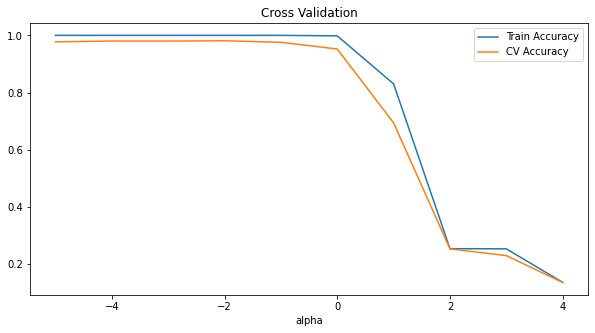

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}


{'alpha': 0.01, 'class_prior': None, 'fit_prior': True}

In [ ]:
vectorizer = TfidfVectorizer(ngram_range = (1, 2))    # configuring TfidfVectorizer for uni-grams and bi-grams
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])   #numeric features of type csr_matrix of 1780 x 287224
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])

model = MultinomialNB()       #Multinomial Naive Bayes Classifier
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]     #smoothing parameter
alphas = {'alpha' : alpha}
best_params = tuning(model, alphas, 'alpha', train_vec, y_train, alpha)   #hyperparameter tuning function call

best_alpha = best_params['alpha']     #optimal alpha
clf = MultinomialNB(alpha = best_alpha).fit(train_vec, y_train)     #fit the model with the optimal value of alpha obtained
y_pred = clf.predict(test_vec)        #predict the class for test_vec 
y_pred_proba = clf.predict_proba(test_vec)      #prediction probabilities

# print(model.get_params())
# clf.get_params()

In [ ]:
# used to know the terms True Positive, True Negative, False Positive, and False Negative values, based on which performance metrics of model can be calculated
confusion_matrix(y_test, y_pred)    

array([[ 98,   0,   2,   0,   2],
       [  1,  75,   0,   0,   1],
       [  1,   0,  83,   0,   0],
       [  0,   0,   0, 102,   0],
       [  0,   0,   0,   0,  80]])

In [ ]:
print(classification_report(y_test, y_pred))

#accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy of model on testing data is', acc)

# macroF1 score
f1 = f1_score(y_test, y_pred, average = 'macro')      
print('F1 Score of model on testing data is', f1)

#log loss
ll = log_loss(y_test, y_pred_proba)
print('Log loss of model on testing data is', ll)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       102
           1       1.00      0.97      0.99        77
           2       0.98      0.99      0.98        84
           3       1.00      1.00      1.00       102
           4       0.96      1.00      0.98        80

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445

Accuracy of model on testing data is 0.9842696629213483
F1 Score of model on testing data is 0.9841965495401453
Log loss of model on testing data is 0.1048792854704535


In [ ]:
#-------------------------------------------------------------------------WITHOUT HYPERPARAMETER TUNING-------------------------------------------------------------------------#

In [ ]:
vectorizer = TfidfVectorizer(ngram_range = (1, 2))        # configuring TfidfVectorizer for uni-grams and bi-grams
train_vec = vectorizer.fit_transform(x_train['cleaned_with_lemma'])      #numeric features of type csr_matrix of 1780 x 287224
test_vec = vectorizer.transform(x_test['cleaned_with_lemma'])

model = MultinomialNB()     #Multinomial Naive Bayes Classifier
model.fit(train_vec, y_train)         #fit the model
y_pred = model.predict(test_vec)      #predict the class for test_vec 
y_pred_proba = model.predict_proba(test_vec)      #prediction probabilities

In [ ]:
# used to know the terms True Positive, True Negative, False Positive, and False Negative values, based on which performance metrics of model can be calculated
confusion_matrix(y_test, y_pred)

array([[ 97,   0,   3,   0,   2],
       [  1,  76,   0,   0,   0],
       [  2,   0,  82,   0,   0],
       [  0,   0,   0, 102,   0],
       [  0,   0,   0,   0,  80]])

In [ ]:
print(classification_report(y_test, y_pred))

#accuracy, F1 score, log loss
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', acc)
print('F1 Score of model on testing data is', f1)
print('Log loss of model on testing data is', ll)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       102
           1       1.00      0.99      0.99        77
           2       0.96      0.98      0.97        84
           3       1.00      1.00      1.00       102
           4       0.98      1.00      0.99        80

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445

Accuracy of model on testing data is 0.9820224719101124
F1 Score of model on testing data is 0.9823857228125256
Log loss of model on testing data is 0.306335081018442
